In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
df=pd.DataFrame

 # Read data from the file and handle null values

In [3]:

df=pd.read_csv('orders.csv' ,na_values=[ 'Not Available', 'unknown'])

In [4]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [5]:
df.shape

(9994, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9988 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,201.189714,229.756854,3.789574,3.484090
std,2885.163629,32063.693350,537.743203,623.245839,2.225110,1.114211
min,1.000000,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,56430.500000,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,99301.000000,18110.000000,22640.000000,14.000000,5.000000


In [8]:
df.isnull().sum()

Order Id            0
Order Date          0
Ship Mode           6
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Category            0
Sub Category        0
Product Id          0
cost price          0
List Price          0
Quantity            0
Discount Percent    0
dtype: int64

 # Rename columns names and  make them lower case and replace space with underscore

In [9]:

df.rename(columns={'Order Id': 'order_id','City':'city'})
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

In [10]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


# Derive new columns discount ,sale price and profit

In [11]:
# derive new columns discount ,sale price and profit
df['discount']=df['list_price']*df['discount_percent']/100
df['sale_price']=df['list_price']-df['discount']
df['profit']=df['sale_price']-df['cost_price']
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3,0.9,29.1,-0.9


# Convert order date from object datatype to datetime

In [12]:

df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")


# Drop cost price,list price, discount percent columns

In [13]:

df.drop(columns=['cost_price','list_price','discount_percent'],inplace=True)

# Load  the data into sql server 

In [14]:

import sqlalchemy as sal
engine = sal.create_engine('mssql://Astha\MSSQLSERVER01/retail_orders?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'quantity', 'discount', 'sale_price', 'profit'],
      dtype='object')

In [17]:
df.to_sql(
    "orders",
    conn,
    if_exists="append",
    index=False
)
        

38

In [18]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


In [19]:
#connect to database

import pyodbc
import pandas as pd

In [20]:
conn=pyodbc.connect(
    "Driver={SQL Server};"
    "Server=Astha\MSSQLSERVER01;"
    "Database=retail_orders;"
    "Trusted_Connection=yes;"
)
cursor = conn.cursor()
cursor.execute("SELECT @@VERSION;")   # test query
row = cursor.fetchone()
print(row[0])

Microsoft SQL Server 2022 (RTM) - 16.0.1000.6 (X64) 
	Oct  8 2022 05:58:25 
	Copyright (C) 2022 Microsoft Corporation
	Developer Edition (64-bit) on Windows 10 Home Single Language 10.0 <X64> (Build 26100: ) (Hypervisor)



# What is the total sales and total profit overall

   total_sales  total_profit
0    2215858.7      205168.7


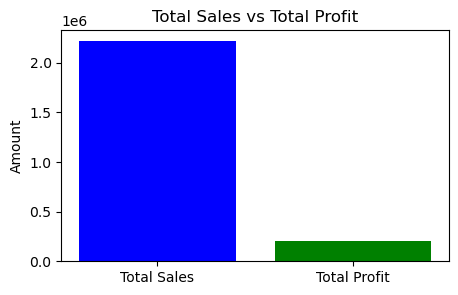

In [22]:
query="""select sum(sale_price)as total_sales,
  sum(profit)as total_profit from df_orders;"""
df=pd.read_sql(query,conn)
print(df)

categories=["Total Sales","Total Profit"]
values=[2215858.7, 205168.7]
plt.figure(figsize=(5,3))
plt.bar(categories ,values, color=("blue","green"))
plt.title("Total Sales vs Total Profit")
plt.ylabel("Amount")
plt.show()


# Which ship mode is most frequantly used

        ship_mode  total_orders
0  Standard Class          5962
1    Second Class          1945
2     First Class          1538
3        Same Day           543
4            None             6


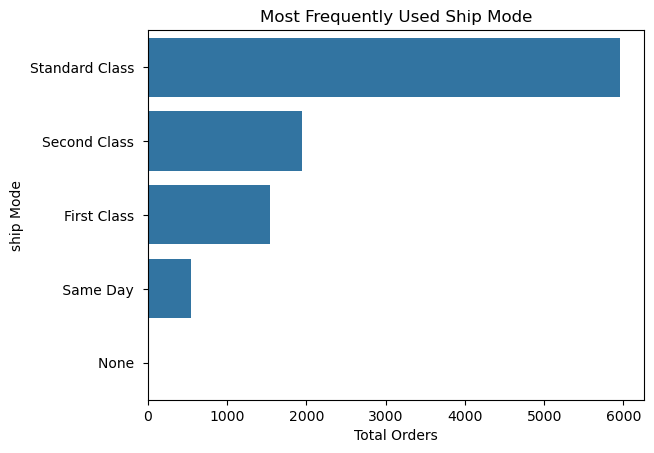

In [23]:
query="""select  ship_mode,count(order_id)as total_orders
 from df_orders
 group by ship_mode
 order by total_orders desc;"""
df=pd.read_sql(query,conn)
print(df)

data=pd.DataFrame({
    "Ship Mode":["Standard Class ","Second Class ","First Class "," Same Day ","None "],
"Total Orders":[5962, 1945,1538, 543, 6]})
sns.barplot(x="Total Orders", y="Ship Mode",data=data)
plt.title("Most Frequently Used Ship Mode")
plt.xlabel("Total Orders")
plt.ylabel("ship Mode")
plt.show()

In [24]:
print(data.columns)

Index(['Ship Mode', 'Total Orders'], dtype='object')


# Which region has the maximum total sales

    region  total_sales
0     West     699858.6
1     East     654320.0
2  Central     483668.6
3    South     378011.5


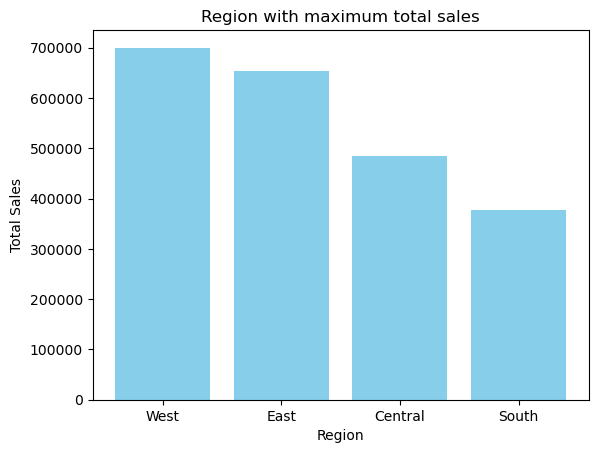

In [25]:
query=""" select  region,sum(sale_price) as total_sales
 from df_orders
 group by region
 order by total_sales desc;"""
df=pd.read_sql(query,conn)
print(df)

region=["West","East","Central","South"]
total_sales=[699858.6, 654320.0,483668.6,378011.5]
plt.bar(region,total_sales,color="skyblue")
plt.title("Region with maximum total sales")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

 # Find the top 5 state by profit

          state  total_profit
0    California       40207.0
1      New York       25557.5
2         Texas       14946.9
3    Washington       11169.7
4  Pennsylvania       10227.4


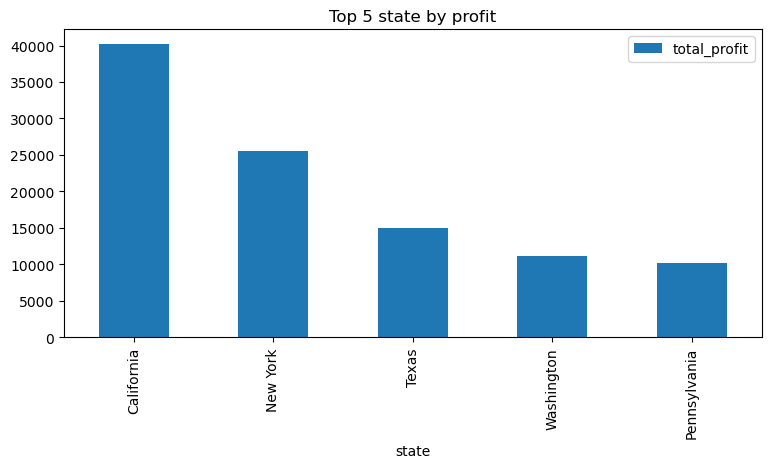

In [26]:
query="""select top 5 state ,sum (profit) as total_profit
 from df_orders
 group by state 
 order by total_profit desc;"""
df=pd.read_sql(query,conn)
print(df)

df.plot(x="state",y="total_profit",
kind="bar" ,figsize=(9,4))
plt.title("Top 5 state by profit" )

plt.show()    
         
 

# Find top 10 highest revenue generating products

        product_id  revenue
0  TEC-CO-10004722  59514.0
1  OFF-BI-10003527  26525.3
2  TEC-MA-10002412  21734.4
3  FUR-CH-10002024  21096.2
4  OFF-BI-10001359  19090.2
5  OFF-BI-10000545  18249.0
6  TEC-CO-10001449  18151.2
7  TEC-MA-10001127  17906.4
8  OFF-BI-10004995  17354.8
9  OFF-SU-10000151  16325.8


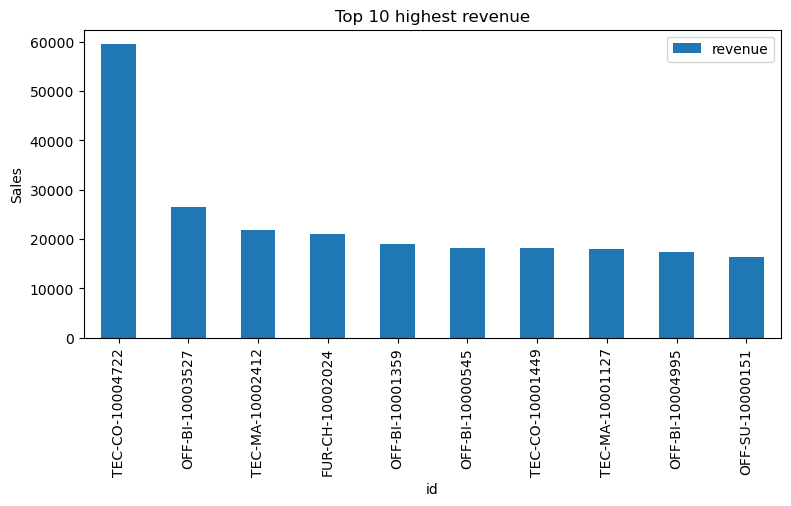

In [27]:
import pandas as pd 
query="""select  top 10 product_id,sum(sale_price)as revenue
from df_orders
group by product_id
order by revenue desc;"""
df=pd.read_sql(query,conn)
print(df)

df.plot(x="product_id",y="revenue",
kind="bar" ,figsize=(9,4))
plt.title("Top 10 highest revenue" )
plt.xlabel("id")
plt.ylabel("Sales")
plt.show()    
         

# Find top 5 highest selling products in each region 

     region       product_id    sales  rn
0   Central  TEC-CO-10004722  16975.0   1
1   Central  TEC-MA-10000822  13770.0   2
2   Central  OFF-BI-10001120  11056.5   3
3   Central  OFF-BI-10000545  10132.7   4
4   Central  OFF-BI-10004995   8416.1   5
5      East  TEC-CO-10004722  29099.0   1
6      East  TEC-MA-10001047  13767.0   2
7      East  FUR-BO-10004834  11274.1   3
8      East  OFF-BI-10001359   8463.6   4
9      East  TEC-CO-10001449   8316.0   5
10    South  TEC-MA-10002412  21734.4   1
11    South  TEC-MA-10001127  11116.4   2
12    South  OFF-BI-10001359   8053.2   3
13    South  TEC-MA-10004125   7840.0   4
14    South  OFF-BI-10003527   7391.4   5
15     West  TEC-CO-10004722  13440.0   1
16     West  OFF-SU-10000151  12592.3   2
17     West  FUR-CH-10001215   9604.0   3
18     West  OFF-BI-10003527   7804.8   4
19     West  TEC-AC-10003832   7722.7   5


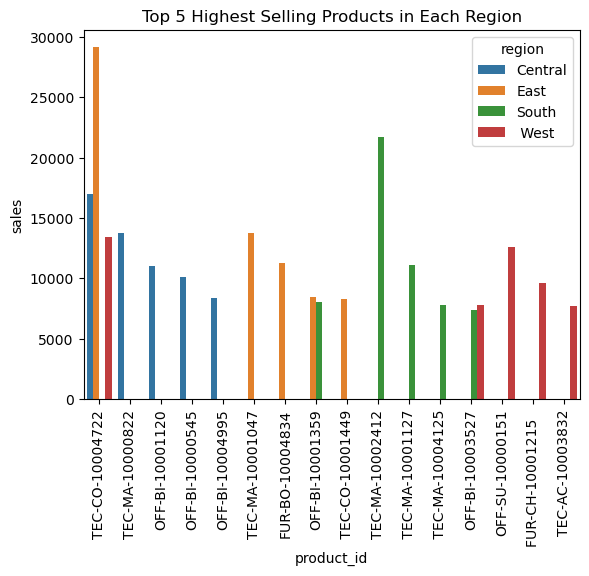

In [28]:
query="""with cte as (
select region,product_id,sum(sale_price)as sales
from df_orders
group by region,product_id)
select* from(
select*,
row_number() over(partition by region order by sales desc)as rn
from cte)as a
where rn <=5;"""
df=pd.read_sql(query,conn)
print(df)
data=pd.DataFrame({
    "region":[ "Central","Central","Central","Central","Central","East","East","East","East","East","South","South","South","South","South"," West"," West"," West"," West"," West",],
    "product_id":["TEC-CO-10004722","TEC-MA-10000822","OFF-BI-10001120", "OFF-BI-10000545","OFF-BI-10004995","TEC-CO-10004722","TEC-MA-10001047","FUR-BO-10004834" ,"OFF-BI-10001359"," TEC-CO-10001449","TEC-MA-10002412"," TEC-MA-10001127", "OFF-BI-10001359"," TEC-MA-10004125",  "OFF-BI-10003527","TEC-CO-10004722","OFF-SU-10000151","FUR-CH-10001215  ","OFF-BI-10003527","TEC-AC-10003832"],
    "sales":[   16975.0 , 13770.0,  11056.5,10132.7,  8416.1, 29099.0, 13767.0,11274.1,8463.6 ,8316,021734.4,11116.4,8053.2,7840.0, 7391.4,13440.0,12592.3,9604.0,7804.8 ,7722.7 ]})
sns.barplot(x="product_id",y="sales",hue="region",data=data)
plt.title("Top 5 Highest Selling Products in Each Region")
plt.xticks(rotation=90) # roatate product ids so they don't overlap
plt.show()

    

In [29]:
print(data.columns)

Index(['region', 'product_id', 'sales'], dtype='object')


# Find month over month growth camparision for 2022 and 2023 sales 

    order_month  sales_2022  sales_2023
0             1     94712.5     88632.6
1             2     90091.0    128124.2
2             3     80106.0     82512.3
3             4     95451.6    111568.6
4             5     79448.3     86447.9
5             6     94170.5     68976.5
6             7     78652.2     90563.8
7             8    104808.0     87733.6
8             9     79142.2     76658.6
9            10    118912.7    121061.5
10           11     84225.3     75432.8
11           12     95869.9    102556.1


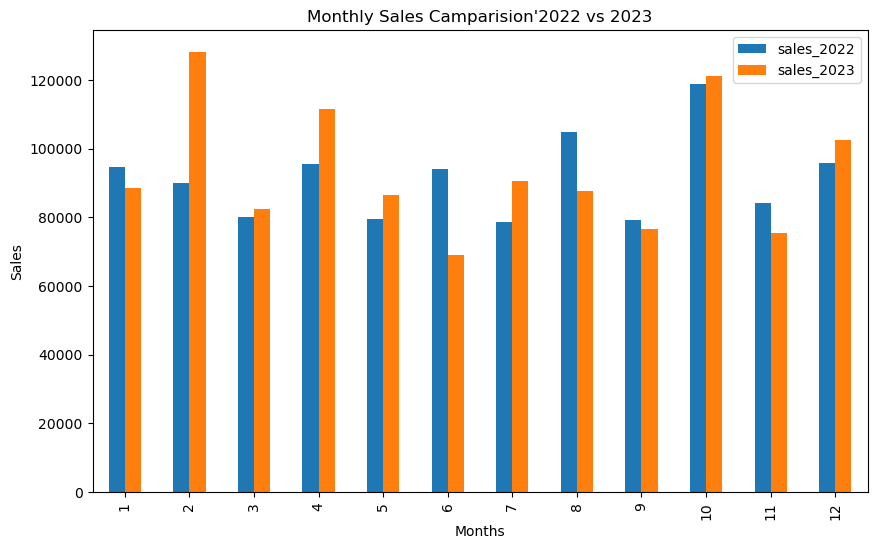

In [30]:
query="""with cte as (
select year(order_date)as order_year,month(order_date) as order_month, sum(sale_price) as sales
from df_orders
group by year(order_date),month(order_date) )
select order_month,
sum(case when order_year=2022 then sales else 0 end) as sales_2022,
sum(case when order_year=2023 then sales else 0 end) as sales_2023
from cte
group by order_month
order by order_month;"""
df=pd.read_sql(query,conn)
print(df)


df.plot(x="order_month",y=["sales_2022","sales_2023"],
kind="bar" ,figsize=(10,6))
plt.title("Monthly Sales Camparision'2022 vs 2023" )
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()
          

# For each category which month had higest sales

          category order_year_month    sales  rn
0        Furniture           202210  42888.9   1
1  Office Supplies           202302  44118.5   1
2       Technology           202310  53000.1   1


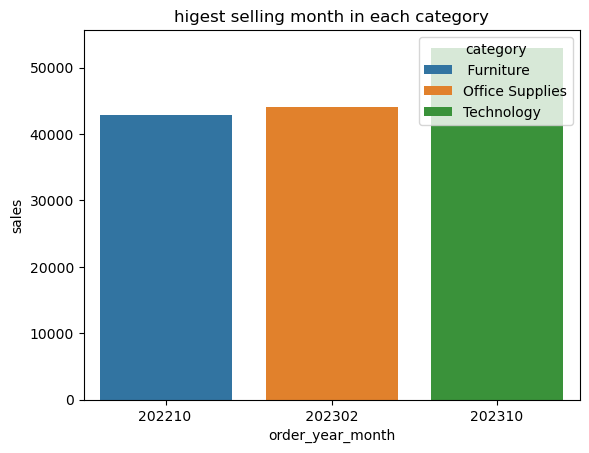

<Figure size 900x1000 with 0 Axes>

In [31]:
query="""with cte as(
select  category,format(order_date,'yyyyMM') as order_year_month ,sum(sale_price) as sales
from df_orders
group by category,format(order_date,'yyyyMM'))
select* from(
select*,
row_number() over(partition by category order by sales desc)as rn
from cte) a
where rn=1;"""
df=pd.read_sql(query,conn)
print(df)
data=pd.DataFrame({
    "category":[" Furniture ","Office Supplies","Technology"],
    "order_year_month":["202210 "," 202302 ","202310"],
    "sales":[42888.9,44118.5 ,53000.1]})
sns.barplot(x= "order_year_month",y="sales",hue= "category",data=data)
plt.title("higest selling month in each category")
plt.figure(figsize=(9,10))
plt.show()
    

-Total sales crosssed 2215858.7  with profit  205168.7,driven manily by the west region and top states like California and new York.Customer prefer standard Class shipping ,technology and office suppliers are the strongest categories,showing overall positive growth.